In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
loan = pd.read_csv('~/Desktop/Projects/Loan_prediction/data/original/loan_approval_dataset.csv' , index_col = 'loan_id')

In [4]:
for col in loan.columns:
    print(loan[col].value_counts() , '\n')
    print('=' * 50)

 no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64 

 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64 

 self_employed
Yes    2150
No     2119
Name: count, dtype: int64 

 income_annum
7000000    62
4100000    59
7600000    57
4700000    56
5300000    55
           ..
3600000    33
3400000    33
9300000    33
8500000    32
6700000    30
Name: count, Length: 98, dtype: int64 

 loan_amount
10600000    27
20000000    24
9400000     24
23900000    23
16800000    23
            ..
33400000     1
36600000     1
33800000     1
37700000     1
36100000     1
Name: count, Length: 378, dtype: int64 

 loan_term
6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name: count, dtype: int64 

 cibil_score
348    16
543    15
538    15
415    14
439    14
       ..
773     2
484     2
893     2
334     2
864     1
Name: count, Length: 601, dtype: int64 

 residential_assets_va

In [4]:
loan.columns = [col.strip() for col in loan.columns]

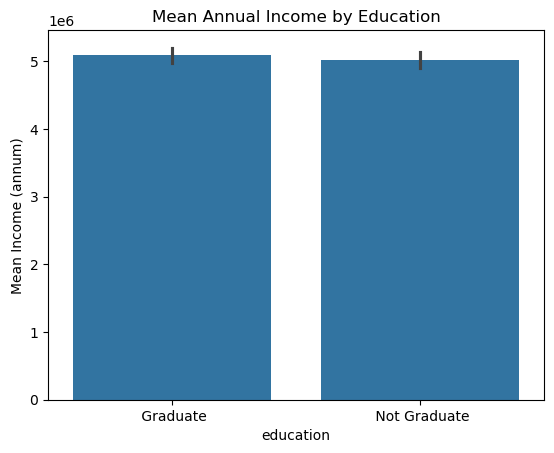

In [15]:
sns.barplot(x='education', y='income_annum', data=loan, estimator=np.mean)
plt.title('Mean Annual Income by Education')
plt.ylabel('Mean Income (annum)')
plt.show()

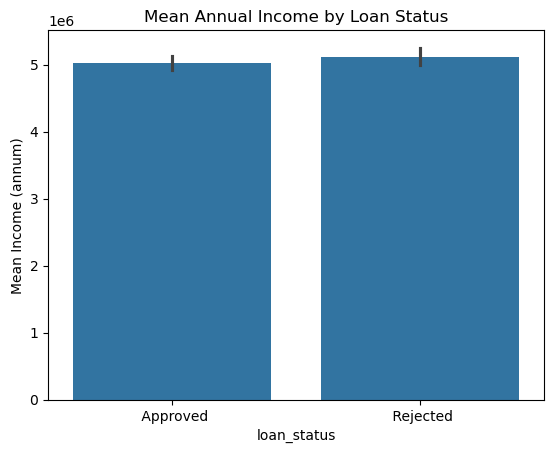

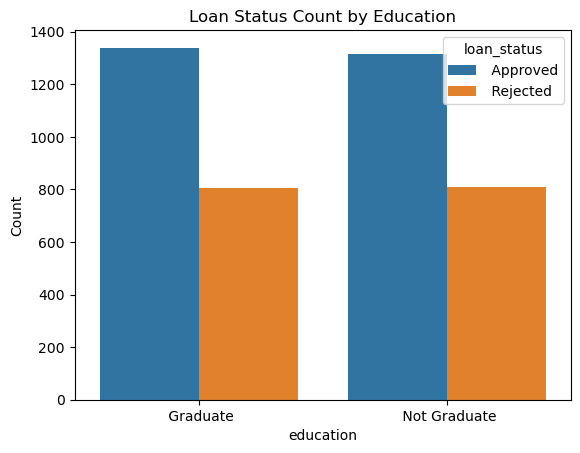

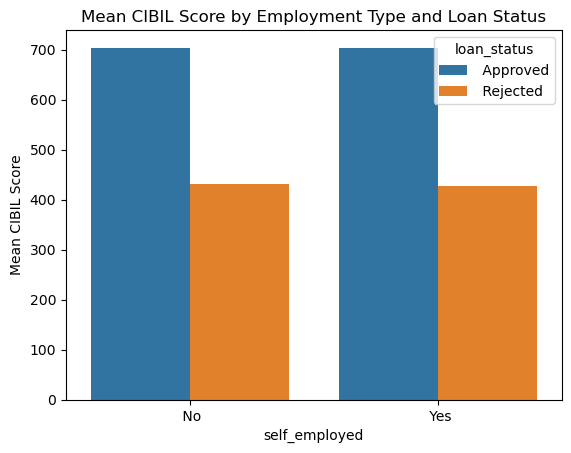

In [16]:
# Visualize mean income_annum by loan_status
sns.barplot(x='loan_status', y='income_annum', data=loan, estimator=np.mean)
plt.title('Mean Annual Income by Loan Status')
plt.ylabel('Mean Income (annum)')
plt.show()

# Visualize count of loans by education and loan_status
loan_grouped = loan.groupby(['education', 'loan_status']).size().reset_index(name='count')
sns.barplot(x='education', y='count', hue='loan_status', data=loan_grouped)
plt.title('Loan Status Count by Education')
plt.ylabel('Count')
plt.show()

# Visualize mean cibil_score by self_employed and loan_status
loan_cibil = loan.groupby(['self_employed', 'loan_status'])['cibil_score'].mean().reset_index()
sns.barplot(x='self_employed', y='cibil_score', hue='loan_status', data=loan_cibil)
plt.title('Mean CIBIL Score by Employment Type and Loan Status')
plt.ylabel('Mean CIBIL Score')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare data for PCA
X = loan.drop('loan_status', axis=1)
X_encoded = pd.get_dummies(X)

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create component names
n_components = pca.n_components_
component_names = [f'PC{i+1}' for i in range(n_components)]

# Create loadings DataFrame
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X_encoded.columns,  # and the rows are the original features
)

print("PCA Loadings:")
print(loadings.head(10))

# Show explained variance ratio
explained_variance = pd.DataFrame({
    'Component': component_names,
    'Explained_Variance_Ratio': pca.explained_variance_ratio_,
    'Cumulative_Variance': pca.explained_variance_ratio_.cumsum()
})

print("\nExplained Variance:")
print(explained_variance.head(10))

cibil_score                 0.803989
loan_term                   0.058769
loan_amount                 0.030197
luxury_assets_value         0.020361
income_annum                0.018508
residential_assets_value    0.018133
commercial_assets_value     0.017450
bank_asset_value            0.016345
no_of_dependents            0.008669
self_employed_ Yes          0.002085
self_employed_ No           0.001975
education_ Not Graduate     0.001813
education_ Graduate         0.001708
dtype: float64


In [18]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(rf, X_encoded, y, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values(by='importance_mean', ascending=False)

print(perm_importance_df)

                     feature  importance_mean  importance_std
4                cibil_score         0.436285        0.004878
3                  loan_term         0.069079        0.002775
2                loan_amount         0.031295        0.000890
1               income_annum         0.008456        0.000867
7        luxury_assets_value         0.005411        0.000632
5   residential_assets_value         0.003162        0.000381
6    commercial_assets_value         0.002670        0.000381
8           bank_asset_value         0.002600        0.000370
0           no_of_dependents         0.001921        0.000403
12        self_employed_ Yes         0.000258        0.000164
11         self_employed_ No         0.000258        0.000164
10   education_ Not Graduate         0.000164        0.000107
9        education_ Graduate         0.000164        0.000107
